<a href="https://colab.research.google.com/github/TristanVenot/Mapimed/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from networkx.algorithms.community import greedy_modularity_communities

def generate_random_network(num_nodes=10, num_edges=5):
    # Create a random graph
    G = nx.gnm_random_graph(num_nodes, num_edges)
    # Adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).todense()
    return G, adj_matrix



Plotting this network

In [2]:

def plot_network_2d(G):
    pos = nx.spring_layout(G)  # 2D layout
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
    plt.title("2D Network Visualization")
    plt.show()

def plot_network_3d(G):
    pos = nx.spring_layout(G, dim=3)  # 3D layout
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='skyblue', s=100)
        ax.text(x, y, z, str(node), fontsize=10, color='black')
    for (u, v) in G.edges():
        x = np.array([pos[u][0], pos[v][0]])
        y = np.array([pos[u][1], pos[v][1]])
        z = np.array([pos[u][2], pos[v][2]])
        ax.plot(x, y, z, color='gray')
    plt.title("3D Network Visualization")
    plt.show()


Getting properties of the network

In [3]:

def calculate_metrics(G):
    # Global efficiency
    global_eff = nx.global_efficiency(G)
    # Modularity (using greedy modularity communities)
    communities = list(greedy_modularity_communities(G))
    modularity = nx.algorithms.community.quality.modularity(G, communities)
    # Density
    density = nx.density(G)
    # Node degree
    degree = dict(G.degree())
    # Node betweenness
    betweenness = nx.betweenness_centrality(G)
    return global_eff, modularity, density, degree, betweenness



Final Code

Adjacency Matrix:
[[0 1 0 0 0 1 1 0 1 0]
 [1 0 1 0 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


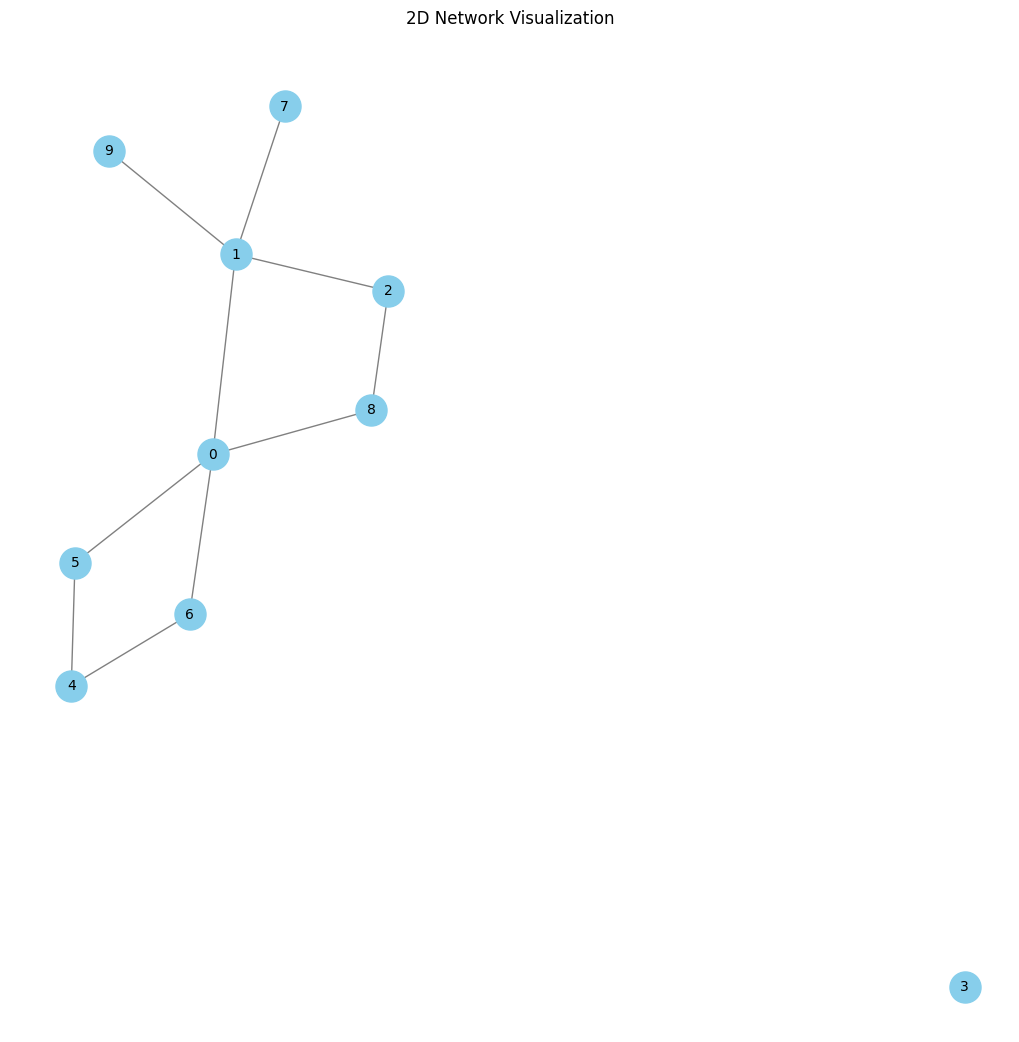

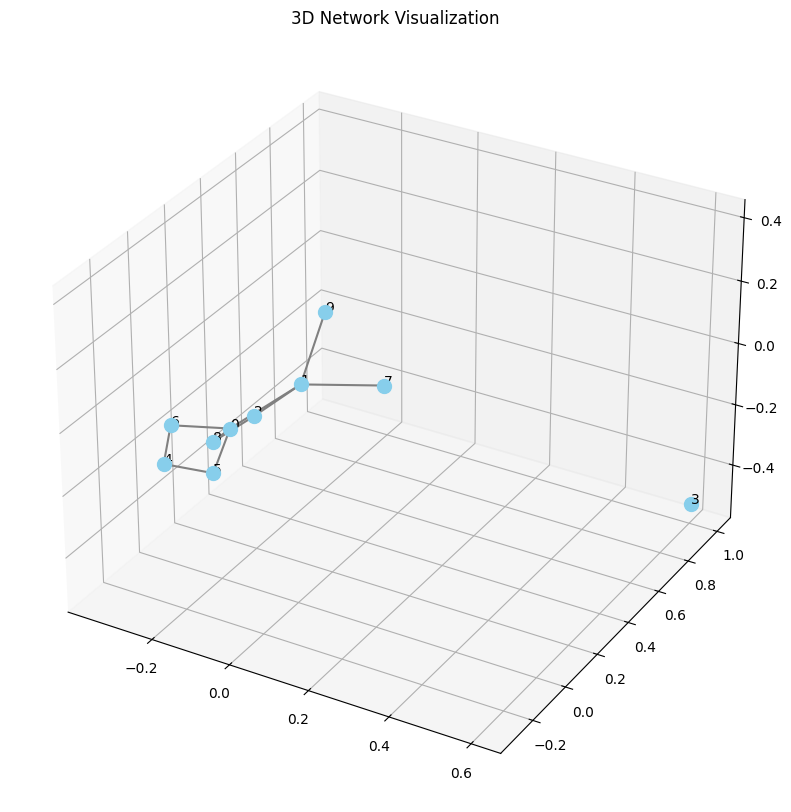

Global Efficiency: 0.4574074074074075
Modularity: 0.32
Density: 0.2222222222222222
Node Degrees:
{0: 4, 1: 4, 2: 2, 3: 0, 4: 2, 5: 2, 6: 2, 7: 1, 8: 2, 9: 1}
Node Betweenness Centrality:
{0: 0.4722222222222222, 1: 0.41666666666666663, 2: 0.041666666666666664, 3: 0.0, 4: 0.013888888888888888, 5: 0.08333333333333333, 6: 0.08333333333333333, 7: 0.0, 8: 0.05555555555555555, 9: 0.0}


In [4]:
def main(num_nodes=10, num_edges=5):
    num_nodes = 10
    num_edges = 10
    G, adj_matrix = generate_random_network(num_nodes, num_edges)
    print("Adjacency Matrix:")
    print(adj_matrix)
    # plt.figure(figsize=(8, 6))
    # nx.draw(G, with_labels=True, node_color='lightblue', node_size=700, font_size=12, edge_color='gray')
    # plt.title("Network Visualization from Adjacency Matrix")
    # plt.show()
    # Plot the network in 2D and 3D
    plot_network_2d(G)
    plot_network_3d(G)

    # Calculate metrics
    global_eff, modularity, density, degree, betweenness = calculate_metrics(G)
    print(f"Global Efficiency: {global_eff}")
    print(f"Modularity: {modularity}")
    print(f"Density: {density}")
    print("Node Degrees:")
    print(degree)
    print("Node Betweenness Centrality:")
    print(betweenness)

if __name__ == "__main__":
    # Customize the number of nodes and edges here
    main(num_nodes=10, num_edges=10)

Applying to a brain network, follow the link to this to download and put it in the folder data : https://instituteicm-my.sharepoint.com/:f:/g/personal/tristan_venot_icm-institute_org/Eo_Gawt1DehNuB3uGKw9wv4Bt2Sz9SU-eEoo9DLPIyGNmg?e=9j153O
